# Linear Regression with AILibs

This notebook demonstrates **pure linear regression** using `AILibs.linear_regression.lr_fit`.

We progress from simple to complex:
1. **1D → 1D** — single input, single output
2. **Multi-input → 1D** — multiple inputs, single output
3. **Multi-input → Multi-output** — multiple inputs and outputs
4. **Noisy data** — regression under noise

In [1]:
import numpy
import matplotlib.pyplot as plt

import AILibs

rng = numpy.random.default_rng(42)

## 1. Simple 1D Linear Regression

Fit $y = a \cdot x$ with a single scalar coefficient.

In [2]:
# generate 1D data: y = 2.5 * x + noise
n_samples = 100
x_1d = rng.uniform(-5, 5, (n_samples, 1))
a_true = numpy.array([[2.5]])
y_1d = x_1d @ a_true + rng.normal(0, 1.0, (n_samples, 1))

# fit
a_est = AILibs.linear_regression.lr_fit(x_1d, y_1d)
y_pred = x_1d @ a_est

print(f"True coefficient:      {a_true.item():.4f}")
print(f"Estimated coefficient: {a_est.item():.4f}")

# evaluate
metrics = AILibs.metrics.regression_evaluation(y_1d, y_pred)
print("\nMetrics:")
print(AILibs.metrics.format_metrics(metrics))

True coefficient:      2.5000
Estimated coefficient: 2.5079

Metrics:
n_samples: 100
n_features: 1
mse: 0.95903
rmse: 0.9793
mae: 0.79237
medae: 0.69133
max_ae: 2.8876
mape: 301.86893
r2: 0.97984
residual_mean: -0.01295
residual_std: 0.98415
mse_1sigma: 0.29366
mse_2sigma: 0.77515
mse_3sigma: 0.95903


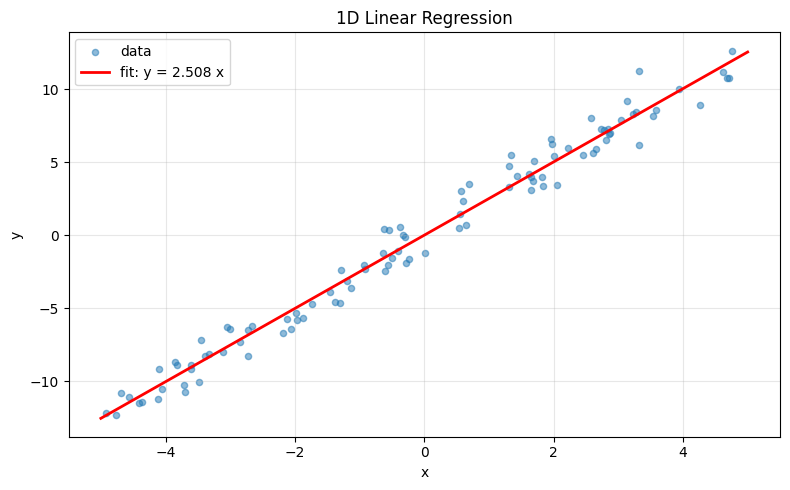

In [3]:
# plot
x_line = numpy.linspace(-5, 5, 200).reshape(-1, 1)
y_line = x_line @ a_est

plt.figure(figsize=(8, 5))
plt.scatter(x_1d, y_1d, alpha=0.5, label="data", s=20)
plt.plot(x_line, y_line, color="red", linewidth=2, label=f"fit: y = {a_est.item():.3f} x")
plt.xlabel("x")
plt.ylabel("y")
plt.title("1D Linear Regression")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 2. Multi-Input, Single Output

Fit $y = X \cdot a$ where $X \in \mathbb{R}^{n \times 5}$ and $a \in \mathbb{R}^{5 \times 1}$.

In [4]:
n_inputs = 5
n_samples = 500

x_multi = rng.standard_normal((n_samples, n_inputs))
a_true_multi = rng.standard_normal((n_inputs, 1))
y_multi = x_multi @ a_true_multi + rng.normal(0, 0.3, (n_samples, 1))

a_est_multi = AILibs.linear_regression.lr_fit(x_multi, y_multi)
y_pred_multi = x_multi @ a_est_multi

metrics_multi = AILibs.metrics.regression_evaluation(y_multi, y_pred_multi)
print("Metrics:")
print(AILibs.metrics.format_metrics(metrics_multi))



Metrics:
n_samples: 500
n_features: 1
mse: 0.08854
rmse: 0.29756
mae: 0.23731
medae: 0.20288
max_ae: 0.9068
mape: 60.27852
r2: 0.97492
residual_mean: 0.01506
residual_std: 0.29748
mse_1sigma: 0.02681
mse_2sigma: 0.06705
mse_3sigma: 0.08707


In [5]:
print("\n\n")
print("a_true_multi = ")
print(a_true_multi)
print("\n\n")
print("a_est_multi = ")
print(a_est_multi)
print("\n\n")




a_true_multi = 
[[ 0.39322978]
 [-0.86198236]
 [ 0.85721035]
 [-1.11204425]
 [ 0.83537699]]



a_est_multi = 
[[ 0.40210651]
 [-0.84960461]
 [ 0.86414091]
 [-1.10458475]
 [ 0.82198552]]





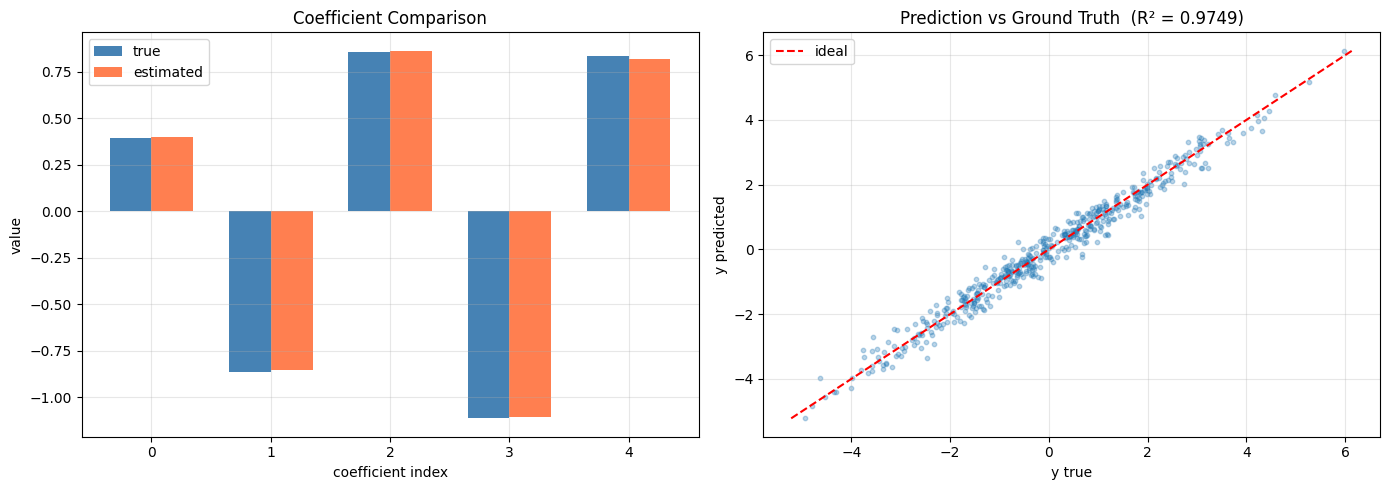

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# coefficient comparison
idx = numpy.arange(n_inputs)
width = 0.35
axes[0].bar(idx - width/2, a_true_multi.flatten(), width, label="true", color="steelblue")
axes[0].bar(idx + width/2, a_est_multi.flatten(), width, label="estimated", color="coral")
axes[0].set_xlabel("coefficient index")
axes[0].set_ylabel("value")
axes[0].set_title("Coefficient Comparison")
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# prediction vs ground truth
axes[1].scatter(y_multi, y_pred_multi, alpha=0.3, s=10)
lims = [min(y_multi.min(), y_pred_multi.min()), max(y_multi.max(), y_pred_multi.max())]
axes[1].plot(lims, lims, "r--", linewidth=1.5, label="ideal")
axes[1].set_xlabel("y true")
axes[1].set_ylabel("y predicted")
axes[1].set_title(f"Prediction vs Ground Truth  (R² = {metrics_multi['r2']:.4f})")
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 3. Multi-Input, Multi-Output

Fit $Y = X \cdot A$ where $X \in \mathbb{R}^{n \times 8}$ and $A \in \mathbb{R}^{8 \times 4}$.

In [7]:
n_inputs_mo  = 8
n_outputs_mo = 4
n_samples_mo = 1000

x_mo = rng.standard_normal((n_samples_mo, n_inputs_mo))
a_true_mo = rng.standard_normal((n_inputs_mo, n_outputs_mo))
Y_mo = x_mo @ a_true_mo

a_est_mo = AILibs.linear_regression.lr_fit(x_mo, Y_mo)
Y_pred_mo = x_mo @ a_est_mo

metrics_mo = AILibs.metrics.regression_evaluation(Y_mo, Y_pred_mo)
print("Metrics (all outputs combined):")
print(AILibs.metrics.format_metrics(metrics_mo))

print(f"\nMax coefficient error: {numpy.max(numpy.abs(a_true_mo - a_est_mo)):.2e}")

Metrics (all outputs combined):
n_samples: 1000
n_features: 4
mse: 0.0
rmse: 0.0
mae: 0.0
medae: 0.0
max_ae: 0.0
mape: 0.0
r2: 1.0
residual_mean: 0.0
residual_std: 0.0
mse_1sigma: 0.0
mse_2sigma: 0.0
mse_3sigma: 0.0

Max coefficient error: 1.55e-15


In [8]:
print("\n\n")
print("a_true_mo = ")
print(a_true_mo)
print("\n\n")
print("a_est_mo = ")
print(a_est_mo)
print("\n\n")




a_true_mo = 
[[-1.15378374  0.0606369   0.30660051 -1.42815664]
 [ 0.75994142  0.76404764  0.97468914  0.29988908]
 [ 0.6370821   2.18502584 -0.3015216  -1.0456915 ]
 [-1.53405988  1.75567393  1.76878726 -0.92459974]
 [-0.72732081 -0.32399104  1.22425687 -1.2873022 ]
 [-1.96661952  2.16751448  0.31237329  0.45441331]
 [-0.20510601  0.46578492 -1.51420588 -0.84092057]
 [ 0.10515788 -2.27089089 -0.30251761 -0.36416437]]



a_est_mo = 
[[-1.15378374  0.0606369   0.30660051 -1.42815664]
 [ 0.75994142  0.76404764  0.97468914  0.29988908]
 [ 0.6370821   2.18502584 -0.3015216  -1.0456915 ]
 [-1.53405988  1.75567393  1.76878726 -0.92459974]
 [-0.72732081 -0.32399104  1.22425687 -1.2873022 ]
 [-1.96661952  2.16751448  0.31237329  0.45441331]
 [-0.20510601  0.46578492 -1.51420588 -0.84092057]
 [ 0.10515788 -2.27089089 -0.30251761 -0.36416437]]





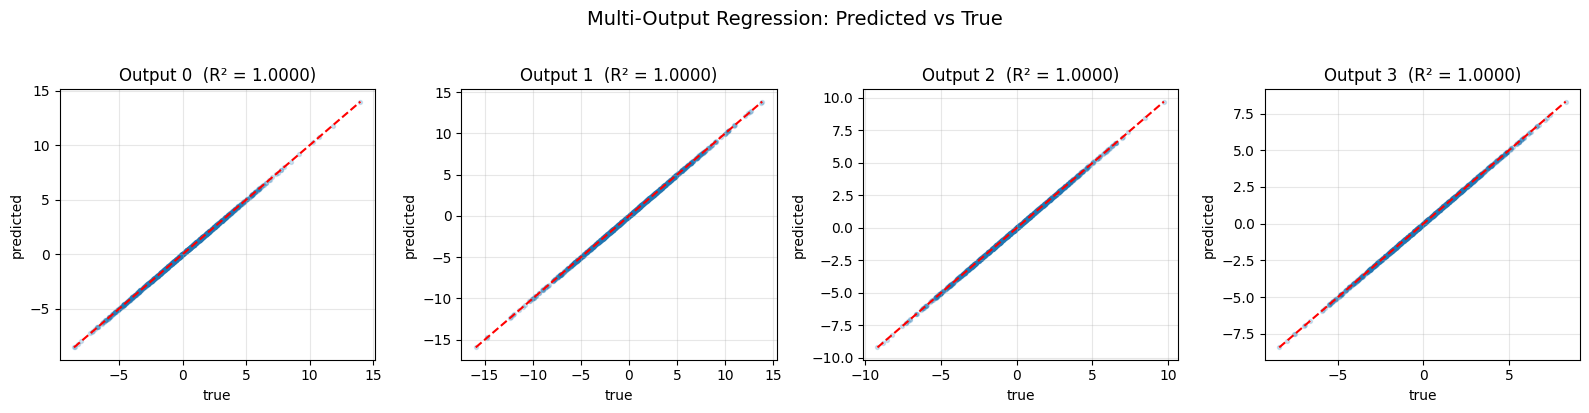

In [9]:
fig, axes = plt.subplots(1, n_outputs_mo, figsize=(4 * n_outputs_mo, 4), sharey=False)

for i in range(n_outputs_mo):
    ax = axes[i]
    ax.scatter(Y_mo[:, i], Y_pred_mo[:, i], alpha=0.2, s=8)
    lims = [Y_mo[:, i].min(), Y_mo[:, i].max()]
    ax.plot(lims, lims, "r--", linewidth=1.5)
    r2_i = AILibs.metrics.regression_evaluation(Y_mo[:, i], Y_pred_mo[:, i])["r2"]
    ax.set_title(f"Output {i}  (R² = {r2_i:.4f})")
    ax.set_xlabel("true")
    ax.set_ylabel("predicted")
    ax.grid(True, alpha=0.3)

plt.suptitle("Multi-Output Regression: Predicted vs True", y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

## 4. Multi-Output with Noisy Data

Adding Gaussian noise to the targets and observing the regression performance.

In [10]:
noise_levels = [0.0, 0.1, 0.5, 1.0, 2.0]

n_inputs_n  = 6
n_outputs_n = 3
n_samples_n = 1000

x_n = rng.standard_normal((n_samples_n, n_inputs_n))
A_true_n = rng.standard_normal((n_inputs_n, n_outputs_n))
Y_clean = x_n @ A_true_n

results = []
for sigma in noise_levels:
    Y_noisy = Y_clean + rng.normal(0, sigma, Y_clean.shape)
    A_est_n = AILibs.linear_regression.lr_fit(x_n, Y_noisy)
    Y_pred_n = x_n @ A_est_n
    m = AILibs.metrics.regression_evaluation(Y_clean, Y_pred_n)
    coeff_err = numpy.mean((A_true_n - A_est_n) ** 2)
    results.append((sigma, m["r2"], m["rmse"], coeff_err))
    print(f"σ = {sigma:.1f}  →  R² = {m['r2']:.5f},  RMSE = {m['rmse']:.5f},  coeff MSE = {coeff_err:.5f}")

σ = 0.0  →  R² = 1.00000,  RMSE = 0.00000,  coeff MSE = 0.00000
σ = 0.1  →  R² = 0.99999,  RMSE = 0.00690,  coeff MSE = 0.00001
σ = 0.5  →  R² = 0.99957,  RMSE = 0.04640,  coeff MSE = 0.00037
σ = 1.0  →  R² = 0.99929,  RMSE = 0.05983,  coeff MSE = 0.00059
σ = 2.0  →  R² = 0.99526,  RMSE = 0.15420,  coeff MSE = 0.00400


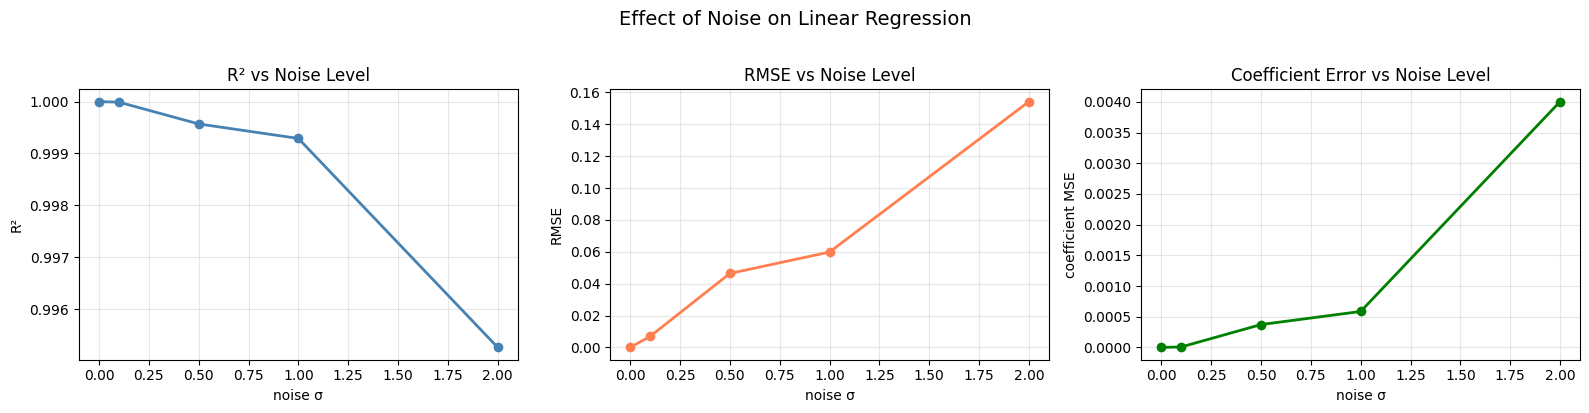

In [11]:
sigmas = [r[0] for r in results]
r2s    = [r[1] for r in results]
rmses  = [r[2] for r in results]
cerrs  = [r[3] for r in results]

fig, axes = plt.subplots(1, 3, figsize=(16, 4))

axes[0].plot(sigmas, r2s, "o-", color="steelblue", linewidth=2)
axes[0].set_xlabel("noise σ")
axes[0].set_ylabel("R²")
axes[0].set_title("R² vs Noise Level")
axes[0].grid(True, alpha=0.3)

axes[1].plot(sigmas, rmses, "o-", color="coral", linewidth=2)
axes[1].set_xlabel("noise σ")
axes[1].set_ylabel("RMSE")
axes[1].set_title("RMSE vs Noise Level")
axes[1].grid(True, alpha=0.3)

axes[2].plot(sigmas, cerrs, "o-", color="green", linewidth=2)
axes[2].set_xlabel("noise σ")
axes[2].set_ylabel("coefficient MSE")
axes[2].set_title("Coefficient Error vs Noise Level")
axes[2].grid(True, alpha=0.3)

plt.suptitle("Effect of Noise on Linear Regression", y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

## 5. Coefficient Matrix Heatmap (Multi-Output)

Visual comparison of the true vs estimated coefficient matrices.

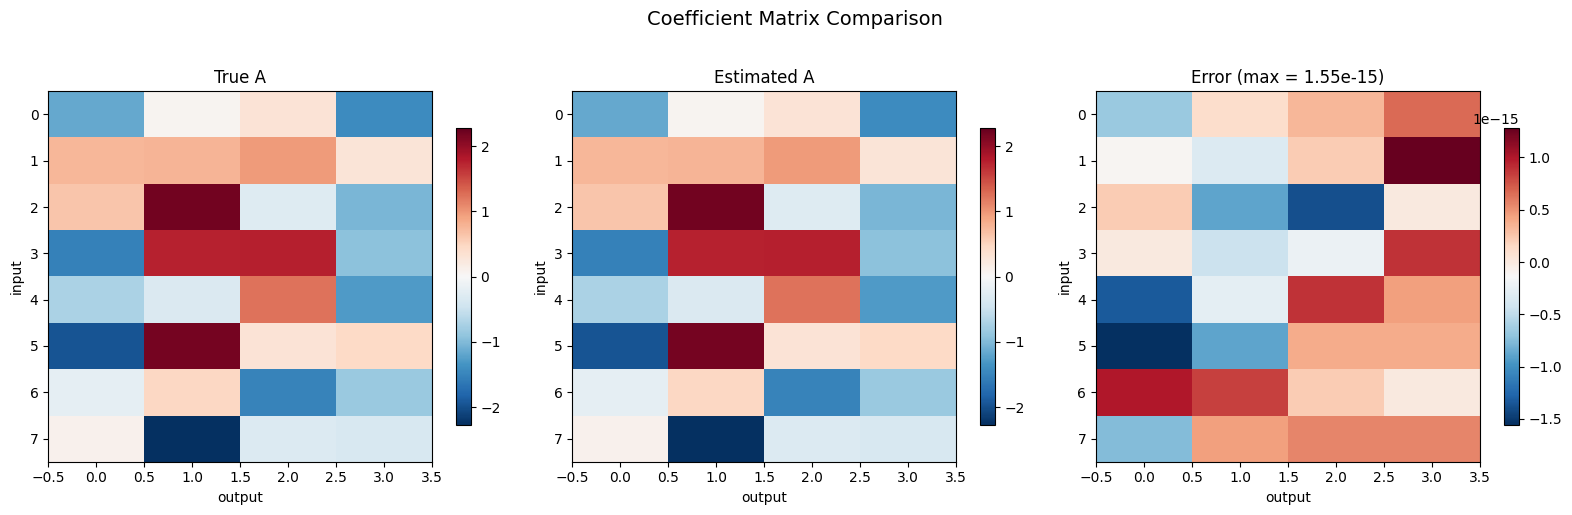

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

vmax = max(numpy.abs(a_true_mo).max(), numpy.abs(a_est_mo).max())

im0 = axes[0].imshow(a_true_mo, cmap="RdBu_r", vmin=-vmax, vmax=vmax, aspect="auto")
axes[0].set_title("True A")
axes[0].set_xlabel("output")
axes[0].set_ylabel("input")
plt.colorbar(im0, ax=axes[0], shrink=0.8)

im1 = axes[1].imshow(a_est_mo, cmap="RdBu_r", vmin=-vmax, vmax=vmax, aspect="auto")
axes[1].set_title("Estimated A")
axes[1].set_xlabel("output")
axes[1].set_ylabel("input")
plt.colorbar(im1, ax=axes[1], shrink=0.8)

diff = a_true_mo - a_est_mo
im2 = axes[2].imshow(diff, cmap="RdBu_r", aspect="auto")
axes[2].set_title(f"Error (max = {numpy.abs(diff).max():.2e})")
axes[2].set_xlabel("output")
axes[2].set_ylabel("input")
plt.colorbar(im2, ax=axes[2], shrink=0.8)

plt.suptitle("Coefficient Matrix Comparison", y=1.02, fontsize=14)
plt.tight_layout()
plt.show()